# Data Science I
### Klausur II im Sommersemester 2024

## Allgemeine Informationen

* Sie haben eine Woche Zeit, um die Klausur zu bearbeiten.

* Sie können alle Quellen verwenden, müssen sie jedoch korrekt benennen. Wenn Sie ChatGPT oder eine ähnliche Software verwenden, müssen Sie dies kenntlich machen und den verwendeten Prompt angeben.

* Sie dürfen in keiner Form Hilfe von Dritten in Anspruch nehmen.

* Sie dürfen Ihren Code nicht mit Dritten teilen (bspw. über ein öffentliches GitHub-Repository)

* Sie sollten die folgenden Pakete verwenden: `numpy, pandas, geopandas, scipy, statsmodels, scikit-learn/sklearn, matplotlib, seaborn` und Pythons Standardlibraries. Diese sind ausreichend, um die Klausur zu lösen. Falls Sie andere Pakete verwenden, rechtfertigen Sie deren Verwendung.

* Falls nicht anders angegeben, nutzen Sie ausschließlich Python Code innerhalb dieses Notebooks zur Lösung der Aufgaben.

* Der Code muss ausreichend kommentiert und verständlich sein. Schreiben Sie Funktionen beim Wiederverwenden von Code. Befolgen Sie im Allgemeinen die Richtlinien aus der Vorlesung. Punkte können aufgrund eines schlecht strukturierten oder unverständlichen Codes abgezogen werden.

* **Begründen Sie immer Entscheidungen** zur Auswahl von Plots, Hypothesentest usw. und **interpretieren Sie** Ihre Ergebnisse.

* Bitte laden Sie Ihr Notebook mit Zellenausgabe sowie alle weiteren Dateien als `.zip`-Verzeichnis mit dem Dateinamen `nachname_matrikelnummer.zip` bis 14. Oktober 2024, 12:00 Uhr mittags auf StudIP in den Ordner `Submission - Exam 2` hoch.

* Fügen Sie dem `.zip`-Verzeichnis auch die unterschriebene Eigenständigkeitserklärung hinzu.

* Wenn Sie Fragen haben, kontaktieren Sie uns bitte rechtzeitig über Rocketchat.

* Nutzen Sie Rocketchat während der Bearbeitungszeit bitte **ausschließlich für Ihre Fragen**.

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import scipy
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.api as sm
from sklearn import datasets, model_selection, metrics, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Einstellungen für ansprechende Plots
sns.set(style="whitegrid")  # Seaborn für bessere Standardplots priorisieren
plt.rcParams["figure.figsize"] = (10, 6)  # Standardgröße für Plots


## Aufgaben und Punkte:

<table>
  <thead>
    <tr>
      <th colspan="2">Aufgabe 1 - Data Preprocessing</th>
      <th colspan="3">Aufgabe 2 - Plotting</th>
      <th colspan="2">Aufgabe 3 - Statistics</th>
      <th colspan="2">Aufgabe 4 - Machine Learning </th>
    </tr>
    <tr>
      <th>Aufgabe 1.1</th>
      <th>Aufgabe 1.2</th>
      <th>Aufgabe 2.1</th>
      <th>Aufgabe 2.2</th>
      <th>Aufgabe 2.3</th>
      <th>Aufgabe 3.1</th>
      <th>Aufgabe 3.2</th>
      <th>Aufgabe 4.1</th>
      <th>Aufgabe 4.2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>6 Punkte </td>
      <td>4 Punkte </td>
      <td>13 Punkte </td>
      <td>10 Punkte</td>
      <td>9 Punkte </td>
      <td>11 Punkte </td>
      <td>5 Punkte </td>
      <td>21 Punkte </td>
      <td>21 Punkte </td>
    </tr>
    <!-- Add more rows as needed -->
  </tbody>
</table>


In [3]:
import warnings

# Unterdrücken von FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

_____
## Aufgabe 0: Setup

Der Klausurordner enthält ein `Dockerfile`, in dem alle relevanten Pakete definiert sind. Das `Dockerfile` baut auf dem Jupyter Server Image auf. Verwenden Sie dieses Dockerfile, um zuerst ein Docker Image zu erstellen und dann einen Docker Container von diesem Image zu starten. Benutzen Sie anschließend die Jupyter Server Instanz, um an der Klausur zu arbeiten. Wir empfehlen dringend, die Docker-Umgebung zu verwenden, um Versionskonflikte zwischen den verschiedenen Paketen zu vermeiden. Code, der in dieser Umgebung nicht ausführbar ist, wird als **nicht funktional** bewertet.

____
## Aufgabe 1: Data Preprocessing (10 Punkte)

### Datenbeschreibung

In dieser Klausur analysieren wir den Datensatz [What A Waste](https://datacatalog.worldbank.org/search/dataset/0039597/What-a-Waste-Global-Database) aus der Datenbank der World Bank. 
Die für uns relevanten Spalten sind u.a.:
- `total_msw_total_msw_generated_tons_year`: Gesamte Tonnen an festen Kommunalabfällen (ff. Abfall)
- `composition_*`: Anteil der jeweiligen Abfallkategorie an `total_msw_total_msw_generated_tons_year`
- `waste_treatment_*`: Weiterverarbeitungsweise des Abfalls
- `waste_collection_*`: Geografische Abdeckung der Abfallabfuhr
- `gpd`: Gross Domestic Product (GDP)/ Bruttoinlandsprodukt (BIP) pro Kopf
- `population_population_number_of_people`: Gesamtbevölkerung

#### Aufgabe 1.1 - Laden der Daten (6 Punkte)
Laden Sie den Datensatz `country_level_data.csv`. Führen Sie anschließend die folgenden Schritte aus:
- Entfernen Sie alle Zeilen mit `nan`-Werten in der Spalte `total_msw_total_msw_generated_tons_year`.
- Fügen Sie dem Dataframe eine neue Spalte `gdp_total` hinzu, die das gesamte GDP für jedes Land angibt.
- Fügen Sie dem Dataframe zwei neue Spalten `relative_waste_pop` und` relative_waste_gdp` hinzu, die die Gesamtabfallmenge relativ zur Gesamtbevölkerung bzw. zum GDP des Landes angibt.

Laden Sie außerdem das Shapefile `data/world-administrative-boundaries/world-administrative-boundaries.shp`. Verwenden Sie dazu den Befehl `geopandas.read_file(<pfad>)`. Diese Datei enthält allgemeine Länderinformationen und -grenzen, die wir später für die Darstellung verwenden werden.

**Hinweis**: `geopandas.GeoDataFrame`-Objekte sind` pandas.DataFrame`-Objekte, die lediglich eine zusätzliche Spalte mit Geometrieinformationen enthalten. Sie können entsprechend alle `pandas`-Methoden mit diesen Dataframes verwenden.

In [4]:
# Laden des country_level_data.csv Datensatzes
data = pd.read_csv('data/country_level_data.csv')

# Entfernen von Zeilen mit nan-Werten in der Spalte 'total_msw_total_msw_generated_tons_year'
data = data.dropna(subset=['total_msw_total_msw_generated_tons_year'])

# Hinzufügen der Spalte 'gdp_total'
data['gdp_total'] = data['gdp'] * data['population_population_number_of_people']

# Hinzufügen der Spalten 'relative_waste_pop' und 'relative_waste_gdp'
data['relative_waste_pop'] = data['total_msw_total_msw_generated_tons_year'] / data['population_population_number_of_people']
data['relative_waste_gdp'] = data['total_msw_total_msw_generated_tons_year'] / data['gdp']

# Laden des Shapefiles
world_boundaries = gpd.read_file('data/world-administrative-boundaries/world-administrative-boundaries.shp')

#### Aufgabe 1.2 - Zusammenführen und Formatieren (4 Punkte)
Fügen Sie die Spalte `continent` aus dem Shapefile-Datenframe zu Ihrem Dataframe der Abfallproduktion mithilfe der Spalten `iso3` und `iso3c` hinzu. Löschen Sie alle Länder für die es keine Übereinstimmung in den beiden Spalten gibt.

In [5]:
# Zusammenführen der Spalte 'continent' aus dem Shapefile-Datenframe mit dem Abfalldaten-DataFrame
data = data.merge(world_boundaries[['iso3', 'continent']], left_on='iso3c', right_on='iso3', how='inner')

# Löschen aller Länder ohne Übereinstimmung in den beiden Spalten
data = data.dropna(subset=['continent'])

_____
## Aufgabe 2: Plotting (32 Punkte)



### Aufgabe 2.1 - Globaler Überblick (13 Punkte)
Erstellen Sie zunächst einen globalen Überblick über die Verteilung von Abfällen, Bevölkerung und Wirtschaftskraft.

#### Aufgabe 2.1.1 (6 Punkte)
Berechnen Sie dazu den Anteil jedes Kontinents an den gesamten globalen Abfällen, der Weltbevölkerung und der Weltwirtschaftsleistung und visualisieren Sie diese in geeigneten Diagrammen.

Der Datensatz enthält die Spalte `income_id`, die das Land als niedriges Einkommen (LIC), niedrigeres mittleres Einkommen (LMC), oberes mittleres Einkommen (UMC) oder hohes Einkommen (HIC) klassifiziert.
Verwenden Sie anstelle des Kontinents die `income_id`, um die Verteilung von Abfall, Bevölkerung und GDP für die Einkommenskategorien zu visualisieren.

Beschreiben Sie Ihre Diagramme und gehen Sie auf die Unterschiede ein.

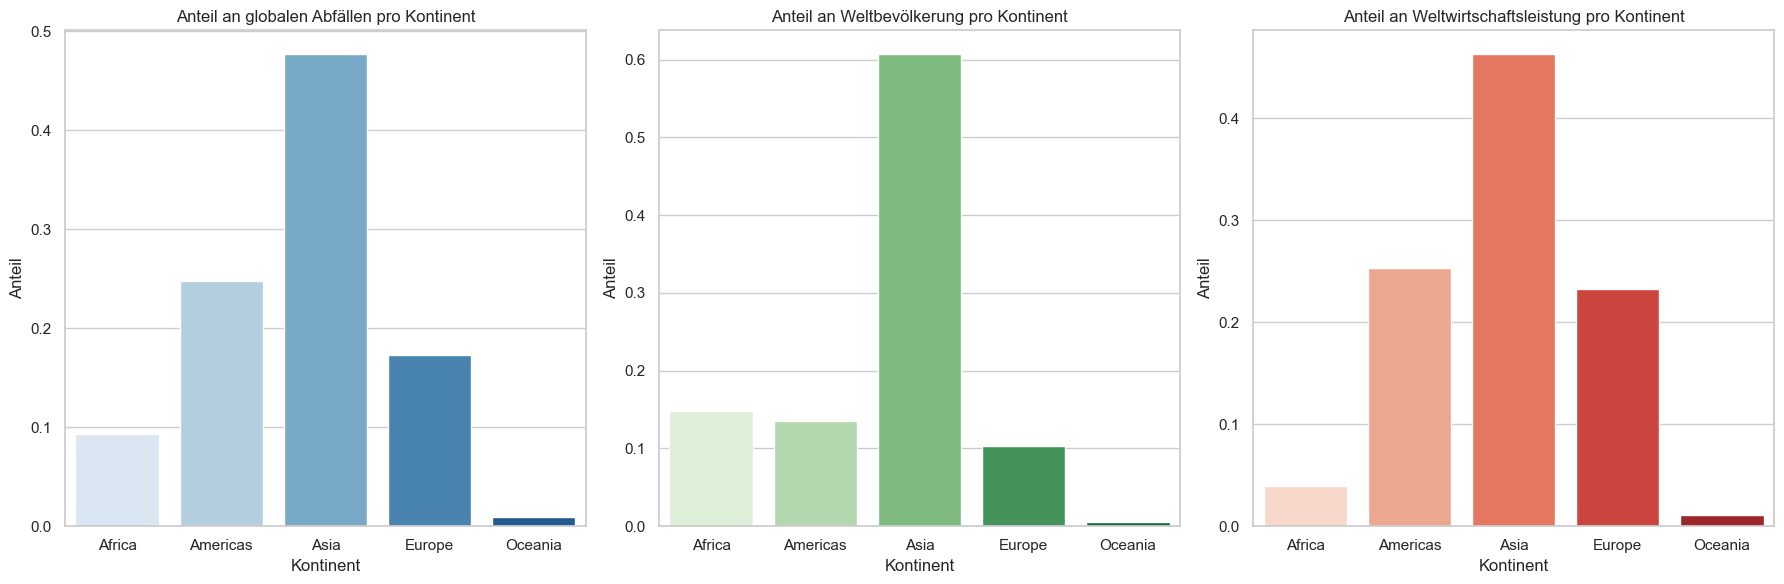

In [6]:
# Berechnung des Anteils jedes Kontinents an den globalen Abfällen, der Weltbevölkerung und der Weltwirtschaftsleistung
continent_group = data.groupby('continent').agg({
    'total_msw_total_msw_generated_tons_year': 'sum',
    'population_population_number_of_people': 'sum',
    'gdp_total': 'sum'
})

continent_group['waste_share'] = continent_group['total_msw_total_msw_generated_tons_year'] / continent_group['total_msw_total_msw_generated_tons_year'].sum()
continent_group['population_share'] = continent_group['population_population_number_of_people'] / continent_group['population_population_number_of_people'].sum()
continent_group['gdp_share'] = continent_group['gdp_total'] / continent_group['gdp_total'].sum()

# Visualisierung der Anteile pro Kontinent mit Seaborn
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x=continent_group.index, y=continent_group['waste_share'], ax=axes[0], palette='Blues')
axes[0].set_title('Anteil an globalen Abfällen pro Kontinent')
axes[0].set_ylabel('Anteil')
axes[0].set_xlabel('Kontinent')

sns.barplot(x=continent_group.index, y=continent_group['population_share'], ax=axes[1], palette='Greens')
axes[1].set_title('Anteil an Weltbevölkerung pro Kontinent')
axes[1].set_ylabel('Anteil')
axes[1].set_xlabel('Kontinent')

sns.barplot(x=continent_group.index, y=continent_group['gdp_share'], ax=axes[2], palette='Reds')
axes[2].set_title('Anteil an Weltwirtschaftsleistung pro Kontinent')
axes[2].set_ylabel('Anteil')
axes[2].set_xlabel('Kontinent')

plt.tight_layout()
plt.show()

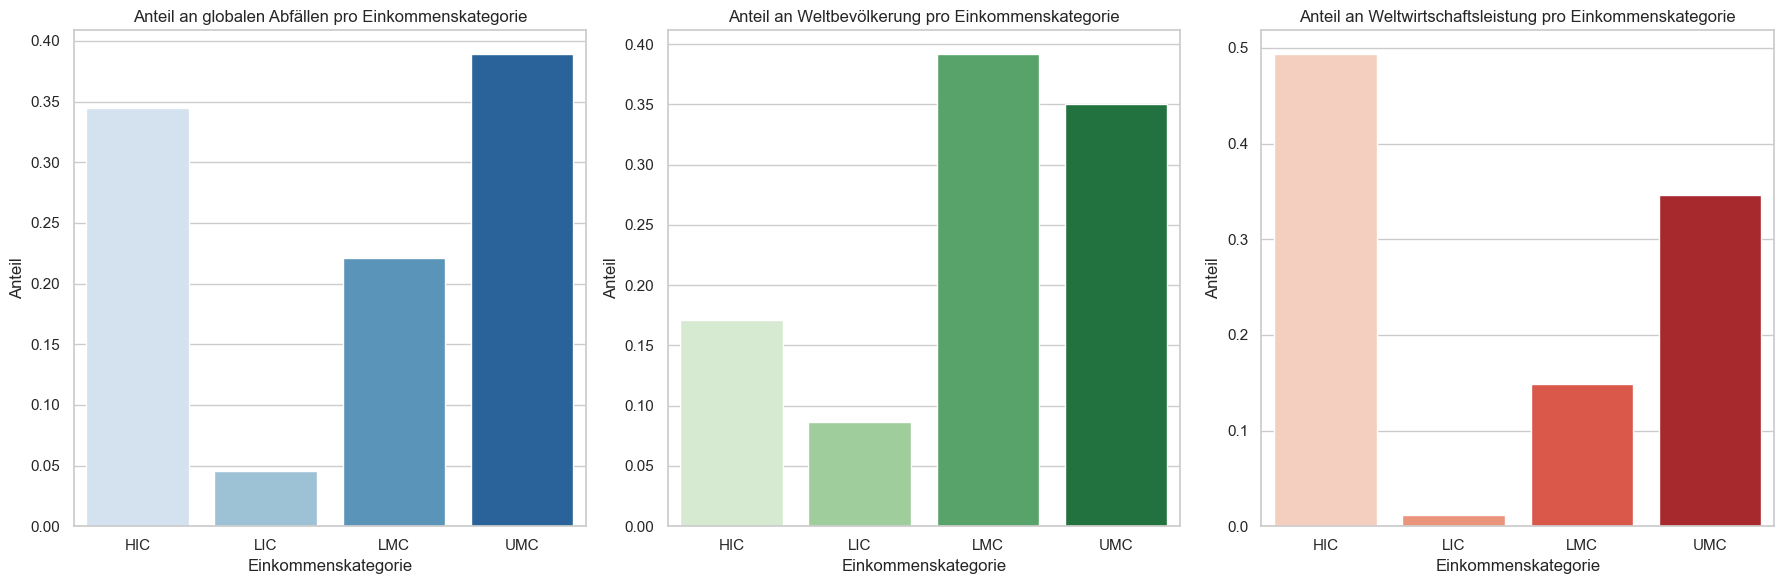

In [7]:
# Berechnung des Anteils für Einkommenskategorien
income_group = data.groupby('income_id').agg({
    'total_msw_total_msw_generated_tons_year': 'sum',
    'population_population_number_of_people': 'sum',
    'gdp_total': 'sum'
})

income_group['waste_share'] = income_group['total_msw_total_msw_generated_tons_year'] / income_group['total_msw_total_msw_generated_tons_year'].sum()
income_group['population_share'] = income_group['population_population_number_of_people'] / income_group['population_population_number_of_people'].sum()
income_group['gdp_share'] = income_group['gdp_total'] / income_group['gdp_total'].sum()

# Visualisierung der Anteile pro Einkommenskategorie mit Seaborn
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x=income_group.index, y=income_group['waste_share'], ax=axes[0], palette='Blues')
axes[0].set_title('Anteil an globalen Abfällen pro Einkommenskategorie')
axes[0].set_ylabel('Anteil')
axes[0].set_xlabel('Einkommenskategorie')

sns.barplot(x=income_group.index, y=income_group['population_share'], ax=axes[1], palette='Greens')
axes[1].set_title('Anteil an Weltbevölkerung pro Einkommenskategorie')
axes[1].set_ylabel('Anteil')
axes[1].set_xlabel('Einkommenskategorie')

sns.barplot(x=income_group.index, y=income_group['gdp_share'], ax=axes[2], palette='Reds')
axes[2].set_title('Anteil an Weltwirtschaftsleistung pro Einkommenskategorie')
axes[2].set_ylabel('Anteil')
axes[2].set_xlabel('Einkommenskategorie')

plt.tight_layout()
plt.show()

##### Beschreibung der Diagramme und Unterschiede

Die Diagramme stellen die Anteile der globalen Abfallproduktion, der Weltbevölkerung und der Weltwirtschaftsleistung pro Kontinent sowie pro Einkommenskategorie dar.

###### Kontinentbasierte Darstellung:

**Anteil der globalen Abfälle pro Kontinent:**  
In diesem Diagramm zeigt sich, dass der größte Anteil an der globalen Abfallproduktion in Asien und Nordamerika zu finden ist. Europa folgt mit einem moderaten Anteil, während Afrika, Südamerika und Australien vergleichsweise geringere Abfallmengen generieren.

**Anteil der Weltbevölkerung pro Kontinent:**  
Hier zeigt sich, dass Asien den höchsten Anteil der Weltbevölkerung besitzt, gefolgt von Afrika. Nordamerika und Europa tragen jeweils nur einen geringen Teil zur Weltbevölkerung bei, ähnlich wie Südamerika und Australien.

**Anteil der Weltwirtschaftsleistung pro Kontinent:**  
Das Diagramm zeigt, dass Nordamerika und Europa den größten Anteil am globalen GDP ausmachen, während Asien ebenfalls einen beachtlichen Beitrag leistet. Afrika, Südamerika und Australien tragen nur einen vergleichsweise geringen Anteil zur globalen Wirtschaft bei.

**Unterschiede:**  
Die Unterschiede in den Diagrammen zeigen, dass die Abfallproduktion und das GDP nicht proportional zur Bevölkerung verteilt sind. Nordamerika und Europa haben im Vergleich zu ihrer Bevölkerung einen hohen Anteil an der Abfallproduktion und der Weltwirtschaftsleistung. Afrika hingegen hat trotz einer hohen Bevölkerungszahl nur geringe Anteile an der Abfallproduktion und am GDP.

###### Einkommenskategoriebasierte Darstellung:

**Anteil der globalen Abfälle pro Einkommenskategorie:**  
Die Abfallproduktion ist in Ländern mit hohem Einkommen (HIC) am höchsten. Länder mit mittlerem Einkommen (LMC, UMC) tragen ebenfalls signifikant zur Abfallproduktion bei, während Länder mit niedrigem Einkommen (LIC) nur einen geringen Anteil ausmachen.

**Anteil der Weltbevölkerung pro Einkommenskategorie:**  
Die Verteilung der Bevölkerung zeigt, dass der größte Anteil in Ländern mit mittlerem Einkommen (LMC, UMC) lebt, während Länder mit hohem Einkommen (HIC) und niedrigem Einkommen (LIC) einen geringeren Anteil an der Weltbevölkerung haben.

**Anteil der Weltwirtschaftsleistung pro Einkommenskategorie:**  
Der größte Anteil des weltweiten GDP wird von Ländern mit hohem Einkommen (HIC) erzeugt. Länder mit mittlerem Einkommen (UMC, LMC) tragen ebenfalls zum weltweiten GDP bei, allerdings in geringerem Ausmaß, während Länder mit niedrigem Einkommen (LIC) nur einen kleinen Anteil beitragen.

**Unterschiede:**  
Die Unterschiede in den Diagrammen zeigen, dass Länder mit hohem Einkommen trotz einer relativ geringen Bevölkerung einen großen Anteil an der Abfallproduktion und der Weltwirtschaftsleistung haben. Länder mit niedrigem Einkommen hingegen tragen wenig zur globalen Abfallproduktion und zum GDP bei, obwohl sie einen nicht unerheblichen Anteil der Weltbevölkerung stellen.

#### Aufgabe 2.1.2 (7 Punkte)
Schauen Sie sich nun die Abfallproduktion für jedes Land genauer an.<br>
Verwenden Sie dazu den Shapefile-Dataframe und `geopandas` ([siehe hier](https://geopandas.org/en/stable/docs/user_guide/mapping.html)), um drei Karten der Welt in einer Figure darzustellen. Die Farbe der Landesfläche sollte dabei von (1) `total_msw_total_msw_generated_tons_year`, (2) `relative_waste_pop` und (3) `relative_waste_gdp` abhängen. Verwenden Sie logarithmierte Werte für die Farbdarstellung und fügen Sie eine Farbskala hinzu.

Welche Beobachtungen machen Sie? Welche Länder stechen bei Ihrer Darstellung hervor?

In [8]:
data.columns

Index(['iso3c', 'region_id', 'country_name', 'income_id', 'gdp',
       'composition_food_organic_waste_percent', 'composition_glass_percent',
       'composition_metal_percent', 'composition_other_percent',
       'composition_paper_cardboard_percent', 'composition_plastic_percent',
       'composition_rubber_leather_percent', 'composition_wood_percent',
       'composition_yard_garden_green_waste_percent',
       'other_information_information_system_for_solid_waste_management',
       'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
       'other_information_national_law_governing_solid_waste_management_in_the_country',
       'other_information_ppp_rules_and_regulations',
       'other_information_summary_of_key_solid_waste_information_made_available_to_the_public',
       'population_population_number_of_people',
       'special_waste_agricultural_waste_tons_year',
       'special_waste_construction_and_demolition_waste_tons_year',
       'special_w

In [19]:
# Laden Sie die Welt-Shapefile-Daten
world = gpd.read_file('data/world-administrative-boundaries/world-administrative-boundaries.shp')

# Überprüfen Sie, ob die Länder-Codes übereinstimmen und korrigieren Sie ggf.
# Einige Länder haben möglicherweise unterschiedliche ISO-Codes
# Hier stellen wir sicher, dass die ISO-Codes dreistellig sind
world['iso_a3'] = world['iso3c'].replace('-99', 'UNK')

# Zusammenführen der Daten mit dem GeoDataFrame
world_data = world.merge(data, left_on='iso_a3', right_on='iso3', how='left')

# Logarithmieren der relevanten Spalten (fügen Sie eine kleine Zahl hinzu, um log(0) zu vermeiden)
for col in ['total_msw_total_msw_generated_tons_year', 'relative_waste_pop', 'relative_waste_gdp']:
    world_data[col + '_log'] = np.log10(world_data[col] + 1e-6)

# Erstellen der Farbpalette mit Seaborn
cmap = sns.color_palette("viridis", as_cmap=True)

# Erstellen der Subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 12))

variables = ['total_msw_total_msw_generated_tons_year', 'relative_waste_pop', 'relative_waste_gdp']
titles = ['Gesamtabfallproduktion (Tonnen/Jahr)', 'Abfall pro Kopf', 'Abfall relativ zum BIP']

for ax, var, title in zip(axes, variables, titles):
    world_data.plot(column=var + '_log', ax=ax, legend=True, cmap=cmap,
                    missing_kwds={'color': 'lightgrey'},
                    legend_kwds={'label': "Log-Skala", 'orientation': "horizontal"})
    ax.set_title(title, fontsize=16)
    ax.axis('off')

plt.tight_layout()
plt.show()

KeyError: 'iso_a3'

##### Beobachtungen zu den Karten und hervorstechende Länder

Die Karten zeigen die weltweite Verteilung der Abfallproduktion, sowohl insgesamt als auch relativ zur Bevölkerung und zum GDP:

- **Gesamtabfall**: Länder mit hoher Bevölkerungszahl und/oder hohem wirtschaftlichem Entwicklungsstand weisen oft eine höhere Abfallproduktion auf. Länder wie die USA, China und Indien stechen hier besonders hervor. Diese Länder haben aufgrund ihrer großen Bevölkerungszahl und hohen Konsumraten eine signifikante Abfallproduktion.

- **Abfall pro Bevölkerung**: Bei der Darstellung des Abfalls pro Kopf sind Länder mit hohem Einkommen (wie die USA, Kanada und europäische Länder) auffällig. Diese Länder haben eine hohe Abfallproduktion pro Person, was auf höhere Konsumgewohnheiten und Lebensstandards hindeutet.

- **Abfall pro GDP**: Bei der Darstellung des Abfalls im Verhältnis zum GDP stechen Länder mit niedrigem oder mittlerem Einkommen hervor, da sie im Verhältnis zu ihrer Wirtschaftskraft relativ viel Abfall produzieren. Dies kann auf ineffiziente Abfallmanagementsysteme und mangelnde Infrastruktur hinweisen, die es erschweren, Abfall effizient zu behandeln und zu reduzieren.

Diese Beobachtungen verdeutlichen die Unterschiede in der Abfallproduktion zwischen verschiedenen Ländern und Regionen sowie die Zusammenhänge zwischen Wirtschaftskraft, Bevölkerung und Abfallmengen.

### Aufgabe 2.2 - Treiber der Abfallproduktion (10 Punkte)
Betrachten wir nun mögliche Ursachen für die Abfallproduktion.

#### Aufgabe 2.2.1 (6 Punkte)
Visualisieren Sie das Verhältnis vom Abfallaufkommen und GDP, sowie vom Abfallaufkommen und der Gesamtbevölkerung der Länder in zwei geeigneten Plots. Fügen Sie Ihren Plots auch den Korrelationskoeffizienten hinzu.

Welche Variable würden Sie eher verwenden, um das Abfallaufkommen eines Landes mit bekannter Gesamtbevölkerung und GDP vorherzusagen?

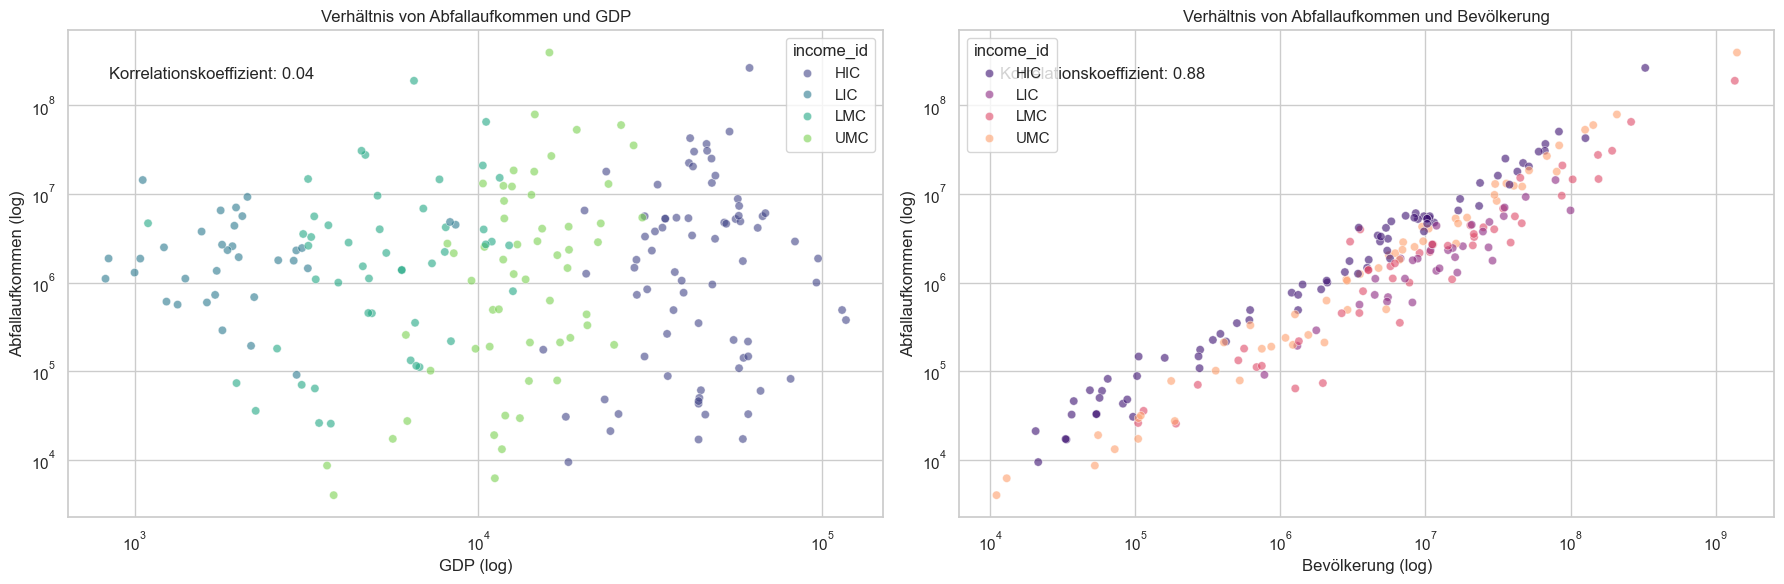

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Scatterplot für Abfallaufkommen vs. GDP
sns.scatterplot(data=data, x='gdp', y='total_msw_total_msw_generated_tons_year', hue='income_id', palette='viridis', alpha=0.6, ax=axes[0])
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlabel('GDP (log)')
axes[0].set_ylabel('Abfallaufkommen (log)')
axes[0].set_title('Verhältnis von Abfallaufkommen und GDP')
correlation_gdp = data['gdp'].corr(data['total_msw_total_msw_generated_tons_year'])
axes[0].text(0.05, 0.9, f'Korrelationskoeffizient: {correlation_gdp:.2f}', transform=axes[0].transAxes)

# Scatterplot für Abfallaufkommen vs. Bevölkerung
sns.scatterplot(data=data, x='population_population_number_of_people', y='total_msw_total_msw_generated_tons_year', hue='income_id', palette='magma', alpha=0.6, ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel('Bevölkerung (log)')
axes[1].set_ylabel('Abfallaufkommen (log)')
axes[1].set_title('Verhältnis von Abfallaufkommen und Bevölkerung')
correlation_population = data['population_population_number_of_people'].corr(data['total_msw_total_msw_generated_tons_year'])
axes[1].text(0.05, 0.9, f'Korrelationskoeffizient: {correlation_population:.2f}', transform=axes[1].transAxes)

plt.tight_layout()
plt.show()


#### Aufgabe 2.2.2 (4 Punkte)
Verwenden Sie dieselben Plots wie in Aufgabe 2.2.1, aber log-transformieren Sie alle Variablen. Beschreiben Sie die Unterschiede.

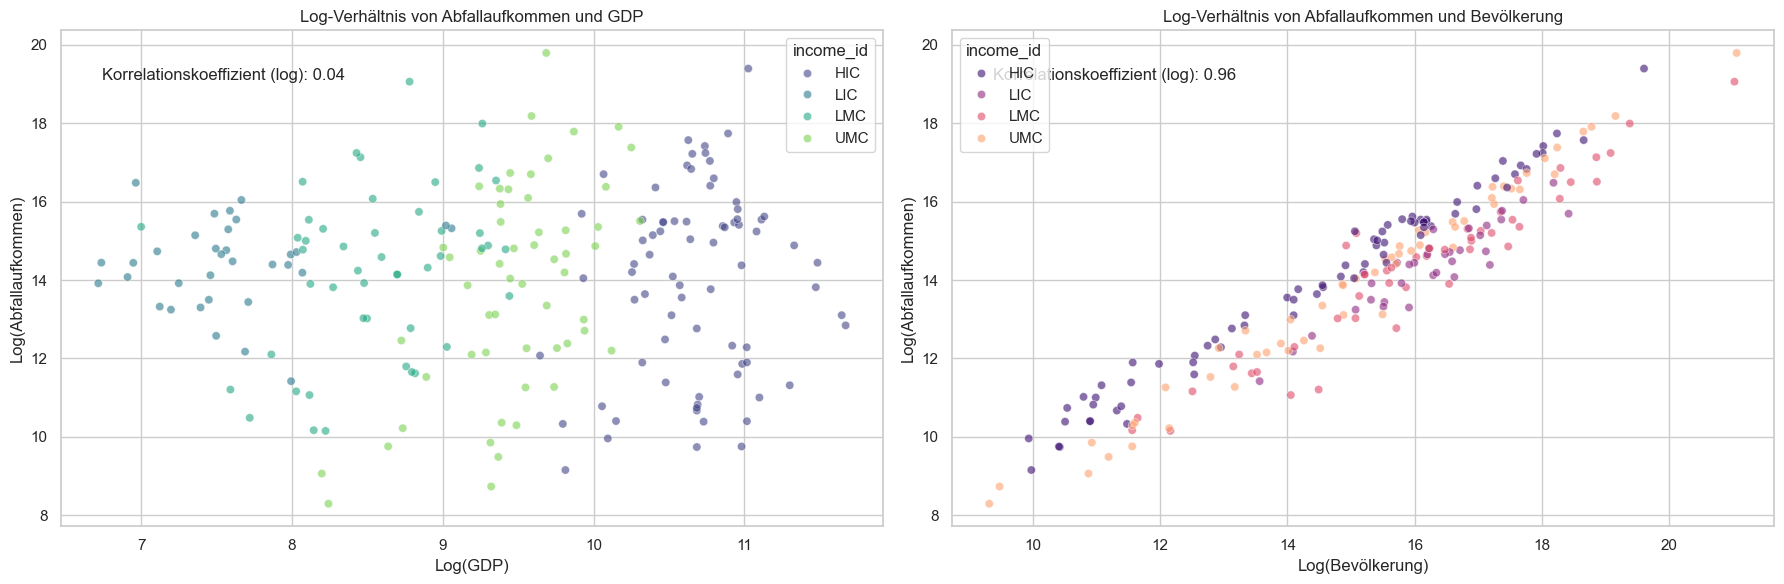

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Scatterplot für log-transformierte Abfallaufkommen vs. GDP
sns.scatterplot(data=data, x=np.log1p(data['gdp']), y=np.log1p(data['total_msw_total_msw_generated_tons_year']), hue='income_id', palette='viridis', alpha=0.6, ax=axes[0])
axes[0].set_xlabel('Log(GDP)')
axes[0].set_ylabel('Log(Abfallaufkommen)')
axes[0].set_title('Log-Verhältnis von Abfallaufkommen und GDP')
correlation_gdp_log = np.log1p(data['gdp']).corr(np.log1p(data['total_msw_total_msw_generated_tons_year']))
axes[0].text(0.05, 0.9, f'Korrelationskoeffizient (log): {correlation_gdp_log:.2f}', transform=axes[0].transAxes)

# Scatterplot für log-transformierte Abfallaufkommen vs. Bevölkerung
sns.scatterplot(data=data, x=np.log1p(data['population_population_number_of_people']), y=np.log1p(data['total_msw_total_msw_generated_tons_year']), hue='income_id', palette='magma', alpha=0.6, ax=axes[1])
axes[1].set_xlabel('Log(Bevölkerung)')
axes[1].set_ylabel('Log(Abfallaufkommen)')
axes[1].set_title('Log-Verhältnis von Abfallaufkommen und Bevölkerung')
correlation_population_log = np.log1p(data['population_population_number_of_people']).corr(np.log1p(data['total_msw_total_msw_generated_tons_year']))
axes[1].text(0.05, 0.9, f'Korrelationskoeffizient (log): {correlation_population_log:.2f}', transform=axes[1].transAxes)

plt.tight_layout()
plt.show()

### Aufgabe 2.3 - Abfallaufkommen pro Kopf (9 Punkte)

Betrachten Sie nun die Pro-Kopf-Abfallproduktion.
Länder mit einem hohen Lebensstandard werden oft dafür kritisiert, dass sie große Mengen an organischen Abfällen produzieren, zu denen in der Regel auch essbare Lebensmittel gehören. 

Visualisieren Sie die Abfälle und das BIP pro Kopf zusammen mit der absoluten Menge der organischen Abfälle pro Kopf. Verwenden Sie die Spalte `composition_food_organic_waste_percent`, um die absolute Menge an organischen Abfällen zu berechnen. 
Verwenden Sie eine Scatterplot und wählen Sie die Größe und Farbe der Punkte in Abhängigkeit von der absoluten Menge der organischen Abfälle pro Kopf. 
Beschriften Sie außerdem die 20 Länder mit dem höchsten und die 20 Länder mit dem niedrigsten Pro-Kopf-Aufkommen an organischen Abfällen mit dem Ländernamen und der Position in der Rangliste der organischen Abfälle aller Länder. Beschränken Sie die Darstellung auf Länder mit mindestens 10.000.000 Einwohnern und schließen Sie alle Länder ohne Informationen über den Anteil organischer Abfälle aus.

Welchen Trend können Sie beobachten? 
Welche Länder sind Ausreißer und folgen nicht dem allgemeinen Trend?

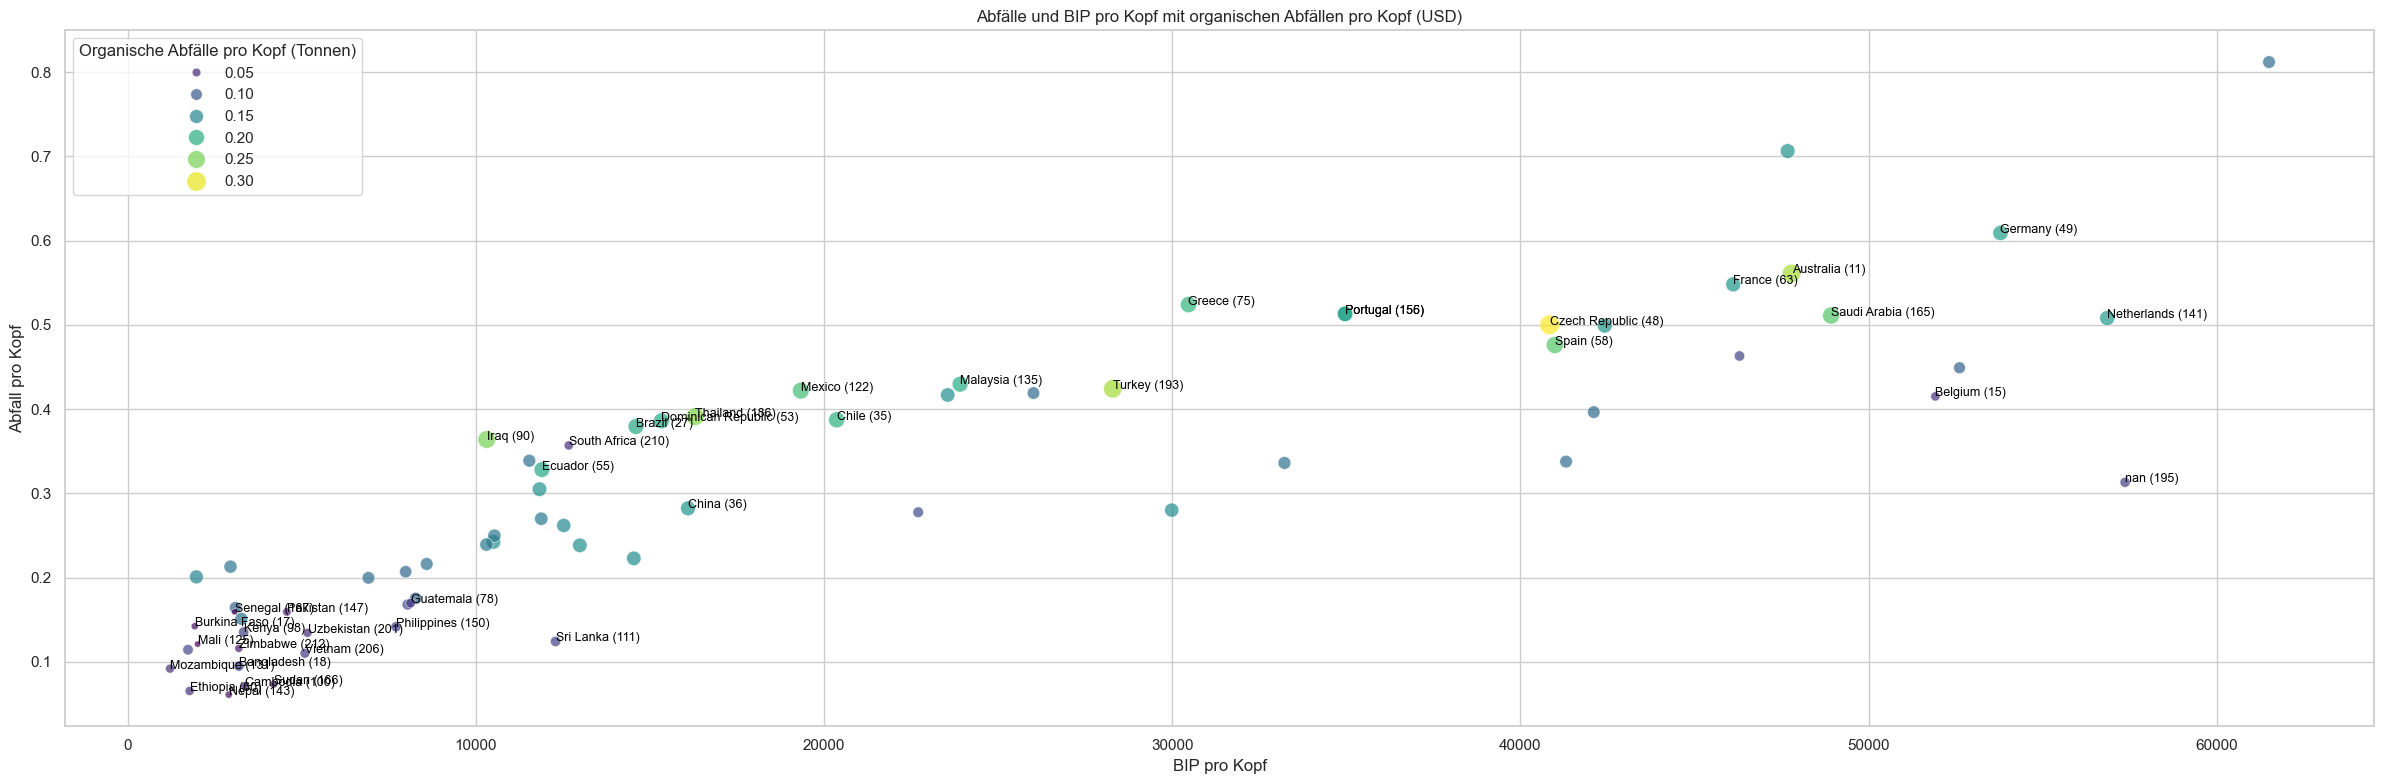

In [86]:
# Berechnung der absoluten Menge an organischen Abfällen pro Kopf
data = data.dropna(subset=['composition_food_organic_waste_percent'])
data = data[data['population_population_number_of_people'] >= 10000000]
data['organic_waste_per_capita'] = (data['composition_food_organic_waste_percent'] / 100) * data['relative_waste_pop']

# Sortierung der Länder nach organischen Abfällen pro Kopf
sorted_data = data.sort_values(by='organic_waste_per_capita', ascending=False)

# Visualisierung der Abfälle und des BIP pro Kopf zusammen mit der absoluten Menge der organischen Abfälle pro Kopf
plt.figure(figsize=(24, 8))
sns.scatterplot(data=sorted_data, x='gdp', y='relative_waste_pop', size='organic_waste_per_capita', hue='organic_waste_per_capita', palette='viridis', alpha=0.7, sizes=(20, 200))

# Beschriftung der 20 Länder mit dem höchsten und den 20 Ländern mit dem niedrigsten Pro-Kopf-Aufkommen an organischen Abfällen
for i in list(sorted_data.head(20).index) + list(sorted_data.tail(20).index):
    plt.text(x=sorted_data.loc[i, 'gdp'], y=sorted_data.loc[i, 'relative_waste_pop'],
             s=f"{sorted_data.loc[i, 'country_name']} ({i + 1})",
             fontsize=9, color='black')

plt.xlabel('BIP pro Kopf')
plt.ylabel('Abfall pro Kopf')
plt.title('Abfälle und BIP pro Kopf mit organischen Abfällen pro Kopf (USD)')
plt.legend(title='Organische Abfälle pro Kopf (Tonnen)')
plt.tight_layout()
plt.show()

##### Beobachtungen und Ausreißer
- Trend: In der Visualisierung zeigt sich, dass Länder mit höherem BIP pro Kopf tendenziell auch eine höhere Pro-Kopf-Abfallproduktion haben. Dies deutet darauf hin, dass der Wohlstand eines Landes mit der Menge an produzierten Abfällen korreliert, insbesondere organische Abfälle.
- Ausreißer: Einige Länder stechen hervor, indem sie entweder viel mehr oder weniger organische Abfälle pro Kopf produzieren als erwartet. Länder wie die USA und einige europäische Staaten produzieren deutlich mehr organische Abfälle pro Kopf, während einige Entwicklungsländer trotz vergleichsweise niedrigem BIP ein höheres Aufkommen an organischen Abfällen zeigen.

___
## Aufgabe 3: Statistics (16 Punkte)


#### Aufgabe 3.1 - Statistischer Hypothesentest (11 Punkte)
In Aufgabe 2.1 haben wir gesehen, dass die HIC- und UMC-Länder den größten Teil des weltweiten Abfalls produzieren und ~50% der Weltbevölkerung ausmachen, d.h. sie können als die einkommensstarke Hälfte der Weltbevölkerung angesehen werden. 

Aber gibt es einen signifikanten Unterschied in der pro Kopf produzierten Abfallmenge zwischen der einkommensstarken und der einkommensschwachen Hälfte der Weltbevölkerung? 

Schreiben Sie das entsprechenden Hypothesenpaar auf und führen Sie einen geeigneten t-Test durch.

In [88]:
# Hypothesen:
# H0: Es gibt keinen signifikanten Unterschied in der pro Kopf produzierten Abfallmenge zwischen der einkommensstarken und einkommensschwachen Hälfte der Weltbevölkerung.
# H1: Es gibt einen signifikanten Unterschied in der pro Kopf produzierten Abfallmenge zwischen der einkommensstarken und einkommensschwachen Hälfte der Weltbevölkerung.

# Einkommensstarke und einkommensschwache Gruppen definieren
high_income_df = data[data['income_id'].isin(['HIC', 'UMC'])]
low_income_df = data[data['income_id'].isin(['LIC', 'LMC'])]

# Pro Kopf Abfallmenge für beide Gruppen berechnen
high_income_waste_per_capita = high_income_df['total_msw_total_msw_generated_tons_year'] / high_income_df['population_population_number_of_people']
low_income_waste_per_capita = low_income_df['total_msw_total_msw_generated_tons_year'] / low_income_df['population_population_number_of_people']

# t-Test durchführen
t_stat, p_value = stats.ttest_ind(high_income_waste_per_capita.dropna(), low_income_waste_per_capita.dropna(), equal_var=False)

# Ergebnisse ausgeben
print(f"t-Statistik: {t_stat:.2f}")
print(f"p-Wert: {p_value:.4f}")

if p_value < 0.05:
    print("Ergebnis: Es gibt einen signifikanten Unterschied in der pro Kopf produzierten Abfallmenge zwischen der einkommensstarken und einkommensschwachen Hälfte der Weltbevölkerung.")
else:
    print("Ergebnis: Es gibt keinen signifikanten Unterschied in der pro Kopf produzierten Abfallmenge zwischen der einkommensstarken und einkommensschwachen Hälfte der Weltbevölkerung.")

t-Statistik: 11.08
p-Wert: 0.0000
Ergebnis: Es gibt einen signifikanten Unterschied in der pro Kopf produzierten Abfallmenge zwischen der einkommensstarken und einkommensschwachen Hälfte der Weltbevölkerung.


#### Aufgabe 3.2 - Statistisches Verständnis (5 Punkte)
Visualisieren Sie die beiden Stichproben in einem Diagramm mithilfe von zwei Histogrammen und beschreiben Sie deren Überlappung.
Finden Sie ein geeignetes Maß, das angibt, wie relevant (**nicht** wie statistisch signifikant) der Unterschied zwischen den beiden Stichproben ist, und interpretieren Sie es.

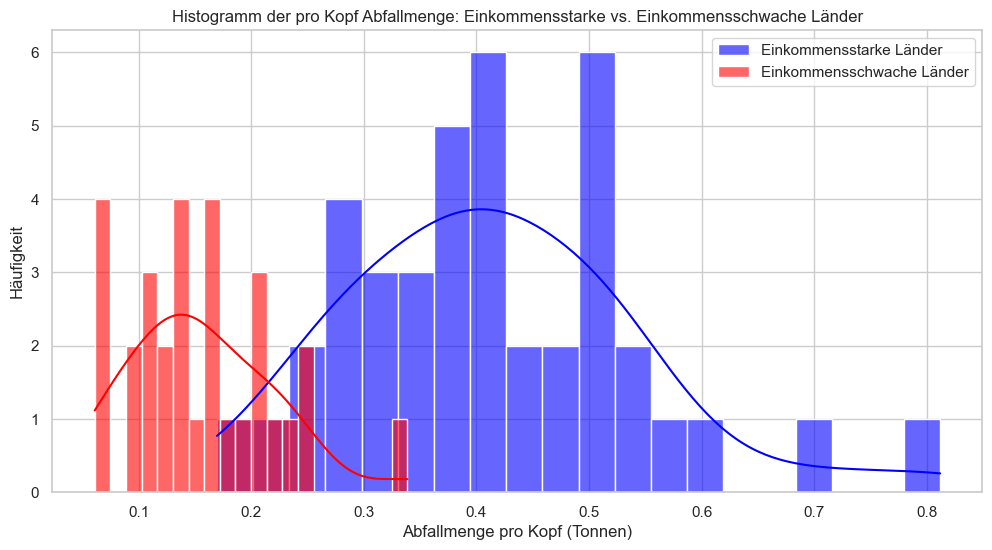

Cohen's d: 2.53


In [89]:
# Visualisierung der beiden Stichproben in einem Histogramm
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(high_income_waste_per_capita.dropna(), color='blue', label='Einkommensstarke Länder', kde=True, ax=ax, bins=20, alpha=0.6)
sns.histplot(low_income_waste_per_capita.dropna(), color='red', label='Einkommensschwache Länder', kde=True, ax=ax, bins=20, alpha=0.6)

ax.set_title('Histogramm der pro Kopf Abfallmenge: Einkommensstarke vs. Einkommensschwache Länder')
ax.set_xlabel('Abfallmenge pro Kopf (Tonnen)')
ax.set_ylabel('Häufigkeit')
plt.legend()
plt.show()

# Effektstärke (Cohen's d) berechnen
diff_mean = high_income_waste_per_capita.mean() - low_income_waste_per_capita.mean()
pool_std = np.sqrt((high_income_waste_per_capita.var() + low_income_waste_per_capita.var()) / 2)
cohen_d = diff_mean / pool_std

print(f"Cohen's d: {cohen_d:.2f}")

___
## Aufgabe 4: Machine Learning (42 Punkte)

### Aufgabe 4.1 - Lineare Regression (21 points)

In Aufgabe 2 haben wir die lineare Beziehung zwischen der Gesamtabfallmenge und der Bevölkerung, sowie dem GDP der Länder dargestellt. In dieser Aufgabe wollen wir diese Effekte mithilfe einer linearen Regression weiter untersuchen. Verwenden Sie das Paket `statsmodels` für Ihre Regressionsanalyse.

#### Aufgabe 4.1.1 – GDP (8 Punkte)
Verwenden Sie das GDP als erklärende Variable für die Gesamtabfallmenge eines Landes. Interpretieren Sie die Koeffizienten und die statistische Signifikanz des Effekts. Plotten Sie Ihre Regressionsgerade mit der Gesamtabfallmenge auf der Y-Achse und dem GDP auf der X-Achse. <br>

#### Aufgabe 4.1.2 – Gesamtbevölkerung (8 Punkte)
Verwenden Sie die **log**-Gesamtbevölkerung als erklärende Variable für die **log**-Gesamtabfallmenge eines Landes. Interpretieren Sie den Koeffizienten für die log-Gesamtbevölkerung und plotten Sie Ihre Regressionsgerade mit dem Gesamtabfall auf der Y-Achse und der **log-Gesamtbevölkerung** auf der X-Achse.<br>

#### Aufgabe 4.1.3 – Kritische Einordnung (5 Punkte)
Diskutieren Sie kurz und kritisch folgende Aussage:

*„Die Abfallproduktion eines Landes hängt hauptsächlich von seiner Wirtschaftskraft ab“*

Vergleichen Sie dazu Ihre beiden linearen Regressionen mit einer geeigneten Metrik. 
Ermitteln Sie außerdem den Korrelationskoeffizienten zwischen GDP und Gesamtbevölkerung und beziehen Sie ihn in Ihre Antwort ein.

### Aufgabe 4.2 – Dimensionsreduktion und Clustering (21 Punkte)

#### Aufgabe 4.2.1 - PCA (Principal Component Analysis) (8 Punkte):
Berücksichtigen Sie alle Spalten im Datensatz, die im Zusammenhang mit dem Abfallaufkommen stehen (z. B. Spalten beginnend mit "waste", "composition" oder "treatment" und numerischen Werten) und füllen Sie fehlende Werte in diesen Spalten mit dem Spaltenmittelwert auf. Führen Sie eine **PCA** durch und projizieren Sie die Daten auf die ersten beiden Hauptkomponenten (**PC1** und **PC2**). Visualisieren Sie die Länder in einem Plot mit **PC1** und **PC2**.

#### Aufgabe 4.2.2 - K-Means-Clustering (7 Punkte)
Führen Sie ein **K-Means-Clustering** mithilfe der ersten beiden Hauptkomponenten durch. Nutzen Sie eine **Hyperparametersuche** (z. B. die **Ellbogenmethode**), um die optimale Anzahl von Clustern (**k**) zu bestimmen.

#### Aufgabe 4.2.3 - Auswertung und Vergleich (6 Punkte)
Visualisieren Sie nebeneinander die **optimalen k Cluster** und die **Einkommenskategorie** mithilfe der PCA-Projektion. Vergleichen Sie die Clusterähnlichkeit mit der Einkommensklasse, indem Sie einen Matching-Score berechnen. Diesen Matching-Score können Sie berechnen, indem Sie für jedes Länderpaar prüfen, ob diese zum gleichen K-Means-Cluster und zur gleichen Einkommensklasse gehören. Wenn sich ein Länderpaar sowohl im K-Means-Clustering als auch in der Einkommensklasse im selben Cluster befindet, wird dies als Übereinstimmung betrachtet. Mit anderen Worten, der Matching-Score wird als Prozentsatz der Paare berechnet, bei denen beide Länder in beiden Klassifizierungen derselben Klasse angehören:

$$
\text{Matching Score} = \left( \frac{\text{Number of matching pairs}}{\text{Total number of pairs}} \right) \times 100
$$

Dabei sind **Matching Pairs** Länderpaare, die zum selben K-Means-Cluster und derselben Einkommensklasse gehören, und die **Gesamtzahl der Paare** ist die Gesamtzahl aller möglichen Länderpaare im Datensatz.

Diskutieren Sie auf der Grundlage Ihrer Analyse, ob die Einkommensklasse Ihrer Meinung nach das Abfallwirtschaftsprofil eines Landes widerspiegelt.